

<center> <h1> <b><span style="color:red"> 
Predictive Analysis <br><br>
Lab 5<br><br>
Understanding Logistic Regression Tables<br></span></b></h1>


## Import the relevant libraries



### information about the dataset: 
Create a logistic regression based on the bank data provided in BB.

The data is based on the marketing campaign efforts of a Portuguese banking institution.The classification goal is to predict if the client will subscribe a term deposit (variable y).
Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting. we  use the dependent variable  'duration' to predict 'y'. 

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    
</i>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score

## Load the data

Load the ‘Bank_data.csv’ dataset under BB.


#Make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.

#Remove the index column thata comes with the data

#Use the map function to change any 'yes' values to 1 and 'no'values to 0. 

In [2]:
df_origin = pd.read_csv('Bank_data.csv')

# remove index
df = df_origin.drop(['Unnamed: 0'], axis=1)

# convert "y" variables
df['y'] = df['y'].map({'no': 0, 'yes': 1})
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Model1: 'duration' as the independent variable.

Model2: 'interest_rate' as the independent variable.

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot.

In [71]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define linear regression function
def lin_reg(x, b0, b1):
    return b0 + b1 * x

Intercept:  [-1.63233799] Coefficient:  [[0.00494578]]
Score:  0.694980694980695
Confusion Matrix: 
[[204  55]
 [103 156]]
Decision Boundary:  [330.04672216]


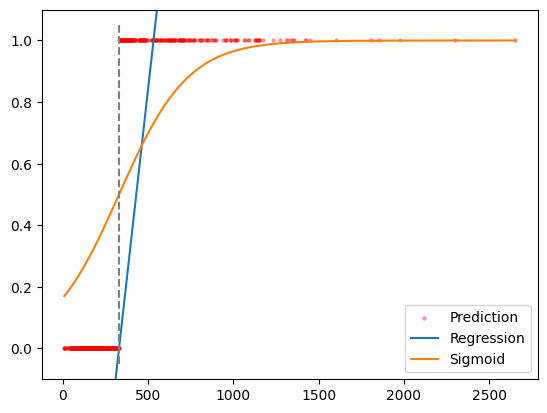

In [118]:
# define indepenent and dependent variable
x = np.array(df['duration']).reshape(-1, 1)
y = np.array(df['y'])

# create the model
model1 = LogisticRegression(solver='liblinear', random_state=0)

# fit the data
model1.fit(x, y)

# check intercept and coefficient
print("Intercept: ", model1.intercept_, "Coefficient: ", model1.coef_)

# get predicted values (probability & binomial)
y_hat_p_M1 = model1.predict_proba(x)
y_hat_c_M1 = model1.predict(x)

# score
print("Score: ", model1.score(x, y))

# confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y, y_hat_c_M1))

# decision boundary
boundary_M1 = -(model1.intercept_ / model1.coef_[0])
print("Decision Boundary: ", boundary_M1)

# plotting the points & lines
#plt.scatter(x, y, s=5, alpha=0.3, label='Actual')
plt.scatter(x, y_hat_c_M1, color='red', s=5, alpha=0.3, label='Prediction')
sample = np.linspace(min(df['duration']), max(df['duration']), 1000)
y_lin = lin_reg(sample, model1.intercept_, model1.coef_)
plt.plot(sample, y_lin[0], label='Regression')
plt.plot(sample, sigmoid(y_lin)[0], label='Sigmoid')
plt.ylim((-0.1, 1.1))
plt.vlines(x=boundary_M1, ymin=-0.05, ymax=1.05, color='grey', linestyles='--')

plt.legend()

Intercept:  [1.55917822] Coefficient:  [[-0.55905463]]
Score:  0.7335907335907336
Confusion Matrix: 
[[183  76]
 [ 62 197]]
Decision Boundary:  [2.78895501]


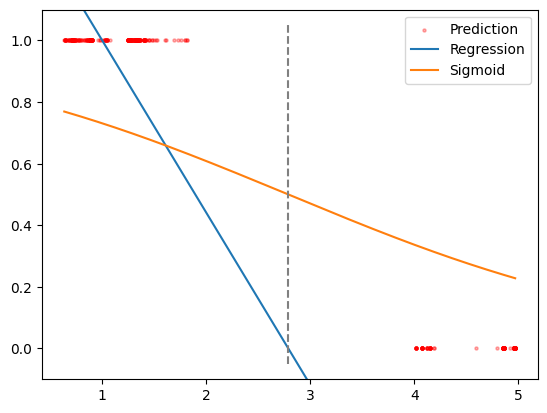

In [120]:
# define indepenent and dependent variable
x = np.array(df['interest_rate']).reshape(-1, 1)
y = np.array(df['y'])

# create the model
model2 = LogisticRegression(solver='liblinear', random_state=0)

# fit the data
model2.fit(x, y)

# check intercept and coefficient
print("Intercept: ", model2.intercept_, "Coefficient: ", model2.coef_)

# get predicted values (probability & binomial)
y_hat_p_M2 = model2.predict_proba(x)
y_hat_c_M2 = model2.predict(x)

# score
print("Score: ", model2.score(x, y))

# confusion matrix
print('Confusion Matrix: ')
print(confusion_matrix(y, y_hat_c_M2))

# decision boundary
boundary_M2 = -(model2.intercept_ / model2.coef_[0])
print("Decision Boundary: ", boundary_M2)

# plotting the points & lines
#plt.scatter(x, y, s=5, alpha=0.3, label='Actual')
plt.scatter(x, y_hat_c_M2, color='red', s=5, alpha=0.3, label='Prediction')
sample = np.linspace(min(df['interest_rate']), max(df['interest_rate']), 1000)
y_lin = lin_reg(sample, model2.intercept_, model2.coef_)
plt.plot(sample, y_lin[0], label='Regression')
plt.plot(sample, sigmoid(y_lin)[0], label='Sigmoid')
plt.vlines(x=boundary_M2, ymin=-0.05, ymax=1.05, color='grey', linestyles='--')
plt.ylim((-0.1, 1.1))

plt.legend()

### Interpretation
What is the model used, 
What method is used.
what is the value of Pseudo R-squared? What does it mean?
What is the coefficient of the duration variable. what does it mean?

I applied the logistic regression with an independent variable as "duration" and "interest_rate".
The followings are comparing two models based on the same evaluation scores and measures.

*In this analysis, I will consider the accuracy as the value of Pseudo R-squared.

Model1: "duration" as independent
- The coefficient showed "0.00494578", which means that the linear equation will be increased by 0.00494578 per the changes in '1' duration, also indicates that the longer the duration is, the higher the probability that the client will subscribe a term deposit.
- The model corrently predicts the 69.50% of data point, which can be calculated by ("True positive" + "True Negative") / Num of data points.
- The number of the uncorrectly predicted as 1 and 0 are 55 and 103, respectively; it shows that the model is more sensitive to the negative (0) label.
- In terms of the decision boundary, I found that if the 'duration' is above 330.04672216, the model predicts 1; otherwise 0.

Model2
- The coefficient showed "-0.55905463", which means that the linear equation will be decreased by -0.55905463 if the interest rate changes by 1%, also imply that the the higher the interest rate, the lower the probability that the client will syvscribe a tem deposit.
- The model corrently predicts the 73.36% of data point.
- Focusing on the confusion matrix, the model does not skew toward either 1 or 0 label; in other words, the model predicted target equally and failed to predict almost the same numbers between two classes; we may conclude that the model shows less bias in terms of the sensitivity toward a specific class.
- As for the decision boundary, I found that id the 'interest_rate' is above 2.78895501, the model predicts 0; otherwise 1.